In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [8]:
img = plt.imread("cute-dog.jpg")[:,:,:3]

In [9]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [10]:
smooth_filter= np.ones((15,15))/225

In [11]:
#Convolve smooth_filter to gray_img with symmetric boundaries
blur_img = signal.convolve2d(gray_img, smooth_filter, boundary="symm", mode="same")

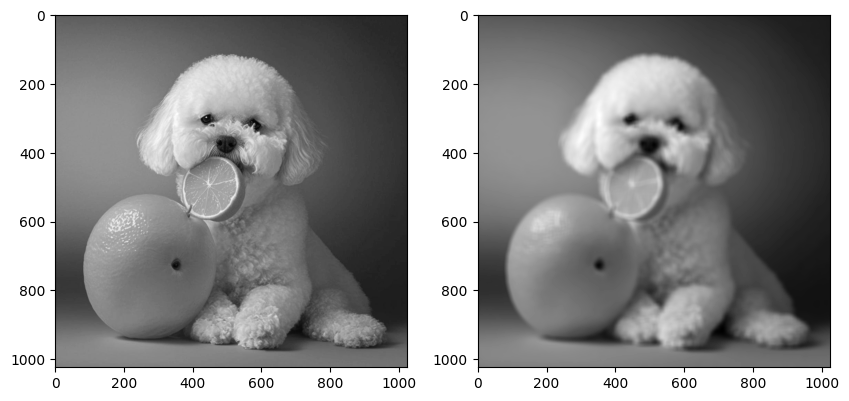

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(gray_img, cmap="gray")
ax2.imshow(blur_img, cmap="gray")

In [13]:
#Creating edge filters on x and y axis
x_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
y_filter = x_filter.T.copy()

In [14]:
#Convolve x and y filters to gray_img with symmetric boundaries
fx = signal.convolve2d(gray_img, x_filter, boundary="symm", mode="same")
fy = signal.convolve2d(gray_img, y_filter, boundary="symm", mode="same")

In [15]:
#Defining gradient magnitude
gm = (fx**2 + fy**2) ** 0.5

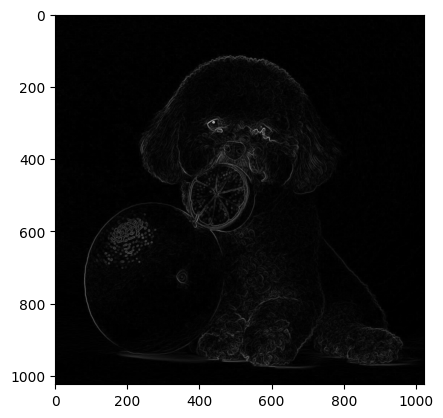

In [16]:
plt.imshow(gm, cmap="gray")

In [26]:
#Defining threshold to find edges above threshold
th = gm.max() - 20*gm.std()
th

113.15214757582311

In [27]:
#Finding edges which are above threshold
im_edge = gm > th

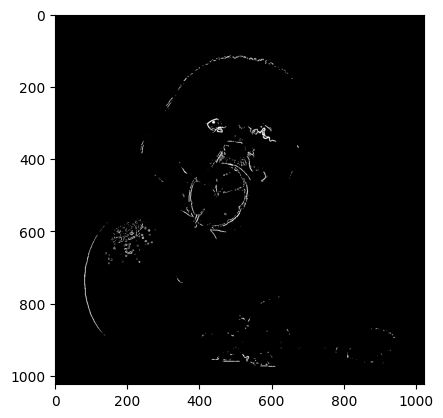

In [28]:
plt.imshow(im_edge, cmap="gray")

In [20]:
#Increasing edges of blured images to make sharpen
sharp_img = blur_img + .6*gm

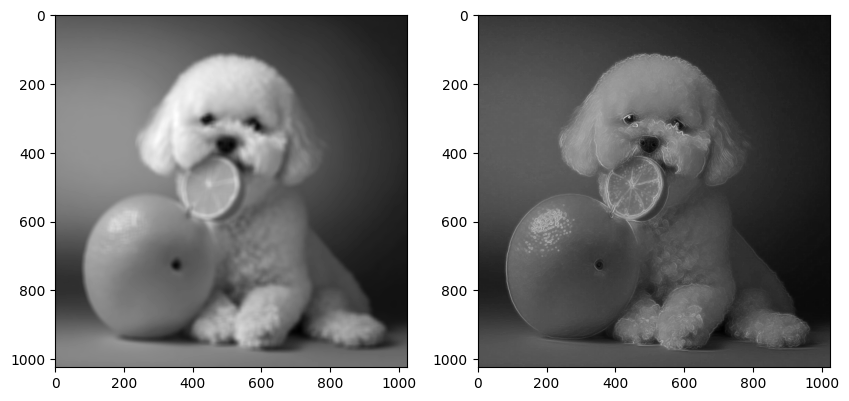

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(blur_img, cmap="gray")
ax2.imshow(sharp_img, cmap="gray")